Nama:

In [1]:
print("Hanun Masitha Ramadhani")

Hanun Masitha Ramadhani


In [4]:
import fbprophet
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/content/daily-min-temperatures.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [23]:
df['ds'] = df['Date']
df['y'] = df['Temp']

df = df.drop(['Date', 'Temp'], axis=1)
df

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [24]:
df.dtypes

ds     object
y     float64
dtype: object

In [25]:
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

(1) Split dataset menjadi trainset (data sampai sebelum tahun 1989), validset (data tahun 1989), dan testset (data tahun 1990)

In [26]:
trainset = df[df['ds'].dt.year < 1989]
validset = df[(df['ds'].dt.year == 1989)]
testset = df[(df['ds'].dt.year > 1974)]

In [27]:
trainset.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [28]:
validset.head()

,ds,y
2920,1989-01-01,14.3
2921,1989-01-02,17.4
2922,1989-01-03,18.5
2923,1989-01-04,16.8
2924,1989-01-05,11.5


In [46]:
testset.tail()

,ds,y
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


(2) Dengan menggunakan trainset dan validset tentukan nilai yearly_seasonality, monthly_seasonality, weekly_seasonality, dan changepoint_prior_scale yang optimal.

In [36]:
from sklearn.metrics import mean_squared_error
def rmse(actual, predicted):
  return mean_squared_error(actual, predicted)**(1/2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


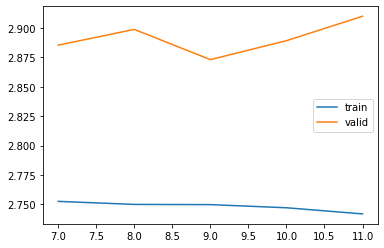

In [39]:
import numpy as np
import seaborn as sns
yearly_seasonality = np.arange(7,12,1)
a = yearly_seasonality
train = []
valid = []
for x in a:
  model = fbprophet.Prophet(yearly_seasonality=x)
  model.fit(trainset)
  y_train_pred = model.predict(trainset[['ds']])['yhat']
  y_valid_pred = model.predict(validset[['ds']])['yhat']

  train.append(rmse(trainset['y'], y_train_pred))
  valid.append(rmse(validset['y'], y_valid_pred))

sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


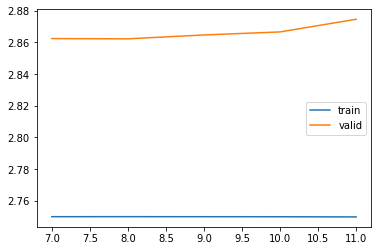

In [41]:
monthly_seasonality = np.arange(7,12,1)
a = yearly_seasonality
train = []
valid = []
for x in a:
  model = fbprophet.Prophet(yearly_seasonality = 9, weekly_seasonality=x)
  model.fit(trainset)
  y_train_pred = model.predict(trainset[['ds']])['yhat']
  y_valid_pred = model.predict(validset[['ds']])['yhat']

  train.append(rmse(trainset['y'], y_train_pred))
  valid.append(rmse(validset['y'], y_valid_pred))

sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

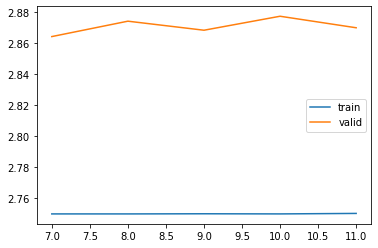

In [42]:
daily_seasonality = np.arange(7,12,1)
a = yearly_seasonality
train = []
valid = []
for x in a:
  model = fbprophet.Prophet(yearly_seasonality = 9, weekly_seasonality=8, daily_seasonality=x)
  model.fit(trainset)
  y_train_pred = model.predict(trainset[['ds']])['yhat']
  y_valid_pred = model.predict(validset[['ds']])['yhat']

  train.append(rmse(trainset['y'], y_train_pred))
  valid.append(rmse(validset['y'], y_valid_pred))

sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

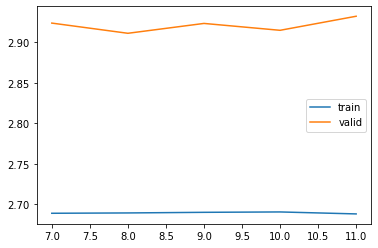

In [43]:
changepoint_prior_scale = [0.001, 0.01]
a = yearly_seasonality
train = []
valid = []
for x in a:
  model = fbprophet.Prophet(yearly_seasonality = 9, 
                            weekly_seasonality=8, 
                            daily_seasonality=9, 
                            changepoint_prior_scale = x)
  model.fit(trainset)
  y_train_pred = model.predict(trainset[['ds']])['yhat']
  y_valid_pred = model.predict(validset[['ds']])['yhat']

  train.append(rmse(trainset['y'], y_train_pred))
  valid.append(rmse(validset['y'], y_valid_pred))

sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

Yearly Seasonality = 9
Weekly Seasonality = 8
Daily Seasonality = 9
Changepoint Prior Scale = 8

(3) Hitung RMSE hasil prediksi testset menggunakan optimized vs unoptimized model

In [44]:
model_def = fbprophet.Prophet()
model_opt = fbprophet.Prophet(yearly_seasonality = 9, 
                            weekly_seasonality=8, 
                            daily_seasonality=9, 
                            changepoint_prior_scale = x)
model_def.fit(trainset)
model_opt.fit(trainset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
y_def_pred = model_def.predict(testset[['ds']])['yhat']
y_opt_pred = model_opt.predict(testset[['ds']])['yhat']

print("Hasil RMSE untuk unoptimazed model = {}".format(rmse(testset['y'], y_def_pred)))
print("Hasil RMSE untuk optimazed model = {}".format(rmse(testset['y'], y_opt_pred)))

Hasil RMSE untuk unoptimazed model = 2.783327339821814
Hasil RMSE untuk optimazed model = 2.749467516802502


(4) Tampilkan plot (+scatter plot validset dan testset) dan plot_components dari model

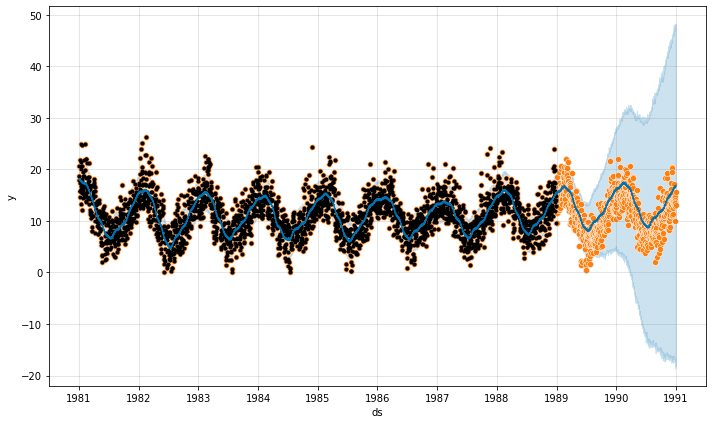

In [49]:
model_opt.plot(model_opt.predict(df[['ds']]))
sns.scatterplot(data=validset, x='ds', y='y')
sns.scatterplot(data=testset, x='ds', y='y')
plt.show()

(5) Buat prediksi min_temperature harian tahun 1991 dan 1992. Tampilkan plotnya.

In [59]:
future = model_opt.make_future_dataframe(49, freq='M')
future =future[2945:]
future

,ds
2945,1991-01-31
2946,1991-02-28
2947,1991-03-31
2948,1991-04-30
2949,1991-05-31
2950,1991-06-30
2951,1991-07-31
2952,1991-08-31
2953,1991-09-30
2954,1991-10-31


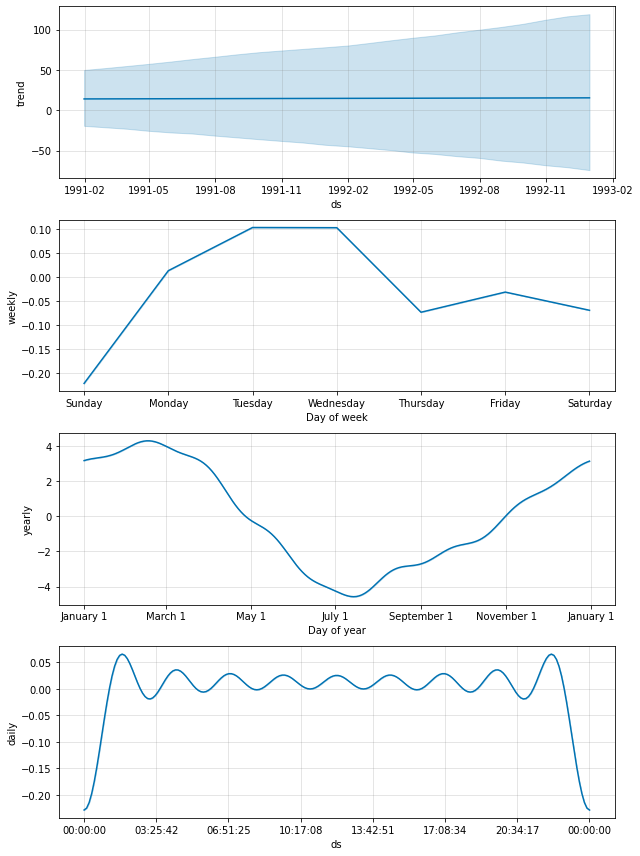

In [62]:
model_opt.plot_components(model_opt.predict(future))
plt.show()